In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



C:\Users\EDWIN\AppData\Local\Temp\ipykernel_34424\1758566886.py:11: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')


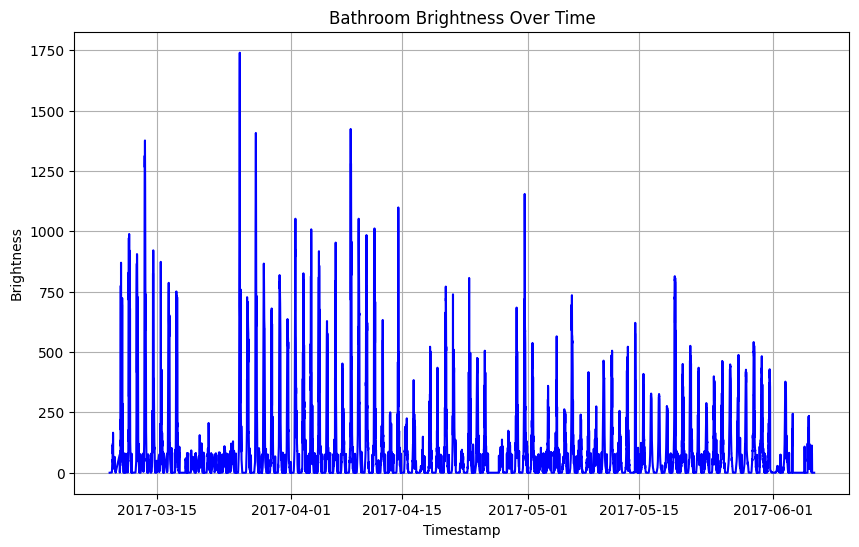

In [10]:

# Path to the CSV file
csv_file_path = 'Bathroom_Brightness.csv'

# Read the CSV file into a DataFrame with tab separation
data = pd.read_csv(csv_file_path, sep=',', header=None, names=['Timestamp_Brightness'])

# Extract timestamp and brightness from the combined column
data[['Timestamp', 'Brightness']] = data['Timestamp_Brightness'].str.split('\t', expand=True)

# Convert timestamp to datetime and brightness to numeric
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data['Brightness'] = data['Brightness'].astype(float)  # Convert to float

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Brightness'], color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Brightness')
plt.title('Bathroom Brightness Over Time')
plt.grid(True)
plt.show()

NULL VALUES PRESENT: 

Timestamp_Brightness    0
Timestamp               0
Brightness              0
dtype: int64
  Timestamp_Brightness           Timestamp  Brightness  Scaled_Brightness
0        1489017527\t0 2017-03-08 23:57:52        0.00          -0.519647
1     1489041538\t0.92 2017-03-09 06:38:56        0.92          -0.514438
2     1489042143\t2.75 2017-03-09 06:49:36        2.75          -0.504076
3     1489042749\t5.49 2017-03-09 06:58:08        5.49          -0.488561
4    1489043354\t10.07 2017-03-09 07:08:48       10.07          -0.462628


C:\Users\EDWIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


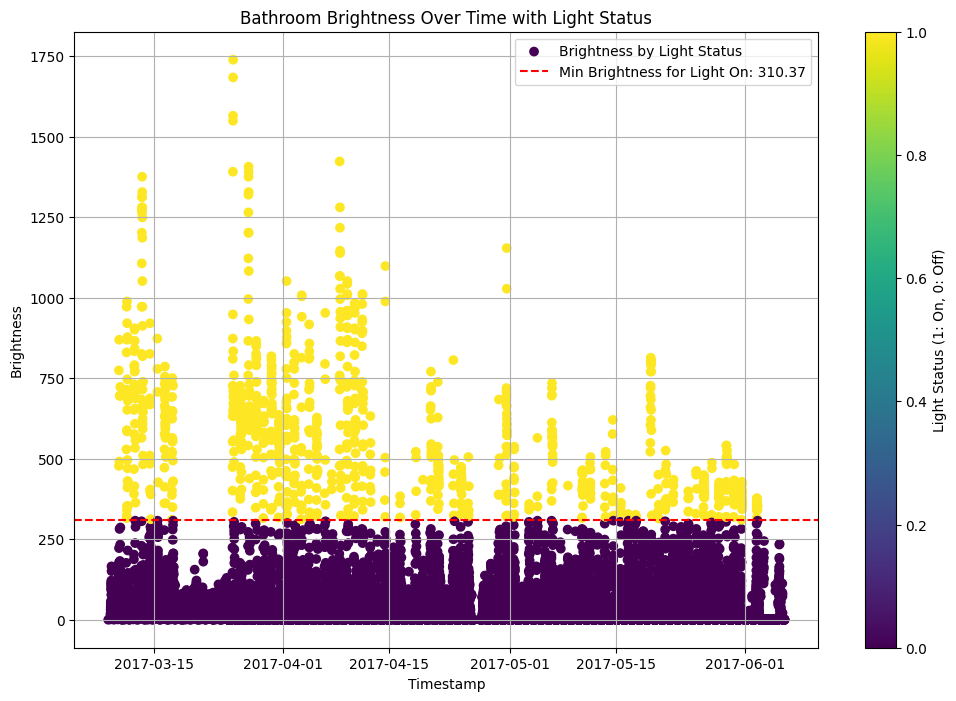

Minimum Brightness Threshold for 'Light On': 310.37


In [11]:


# Example data loading step (ensure df1 is correctly loaded with 'Timestamp' and 'Brightness' before this step)
df1=pd.DataFrame(data)


# 1. Check for missing values
print("NULL VALUES PRESENT: \n")
print(df1.isnull().sum())

# 2. Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
# Impute on the 'Brightness' column
df1['Brightness'] = imputer.fit_transform(df1[['Brightness']])


# Scaling the Brightness for more effective clustering
scaler = StandardScaler()
df1['Scaled_Brightness'] = scaler.fit_transform(df1[['Brightness']])
print(df1.head())  # Print some rows to see the data

# Applying K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df1['Cluster'] = kmeans.fit_predict(df1[['Scaled_Brightness']])

# Determining which cluster corresponds to 'light on' and 'light off'
cluster_centers = kmeans.cluster_centers_.flatten()
light_on_cluster = cluster_centers.argmax()  # Assuming the cluster with the higher mean is 'light on'

# Assigning labels based on the identified cluster
df1['Light_Status'] = (df1['Cluster'] == light_on_cluster).astype(int)

# Find the minimum brightness value where the light is predicted to be on
min_brightness_on = df1[df1['Light_Status'] == 1]['Brightness'].min()

# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(df1['Timestamp'], df1['Brightness'], c=df1['Light_Status'], cmap='viridis', label='Brightness by Light Status')
plt.colorbar(label='Light Status (1: On, 0: Off)')
plt.axhline(y=min_brightness_on, color='red', linestyle='--', label=f'Min Brightness for Light On: {min_brightness_on:.2f}')
plt.xlabel('Timestamp')
plt.ylabel('Brightness')
plt.title('Bathroom Brightness Over Time with Light Status')
plt.legend()
plt.grid(True)
plt.show()


print("Minimum Brightness Threshold for 'Light On':", min_brightness_on)


C:\Users\EDWIN\AppData\Local\Temp\ipykernel_34424\2760735980.py:11: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')


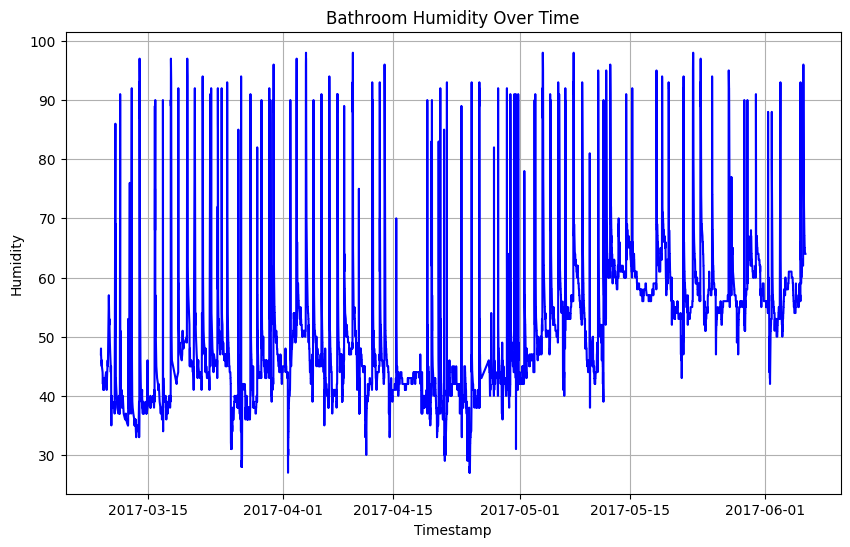

In [12]:


# Path to the CSV file
csv_file_path = 'Bathroom_Humidity.csv'

# Read the CSV file into a DataFrame with tab separation
data = pd.read_csv(csv_file_path, sep=',', header=None, names=['Timestamp_Humidity'])

# Extract timestamp and brightness from the combined column
data[['Timestamp', 'Humidity']] = data['Timestamp_Humidity'].str.split('\t', expand=True)

# Convert timestamp to datetime and brightness to numeric
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data['Humidity'] = data['Humidity'].astype(float)  # Convert to float

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Humidity'], color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Humidity')
plt.title('Bathroom Humidity Over Time')
plt.grid(True)
plt.show()

NULL VALUES PRESENT: 

Timestamp_Humidity    0
Timestamp             0
Humidity              0
dtype: int64
  Timestamp_Humidity           Timestamp  Humidity  Scaled_Humidity
0     1489017527\t47 2017-03-08 23:57:52      47.0        -0.362546
1     1489018733\t48 2017-03-09 00:19:12      48.0        -0.272337
2     1489019335\t47 2017-03-09 00:29:52      47.0        -0.362546
3     1489022346\t46 2017-03-09 01:18:56      46.0        -0.452755
4     1489027133\t45 2017-03-09 02:37:52      45.0        -0.542964


C:\Users\EDWIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


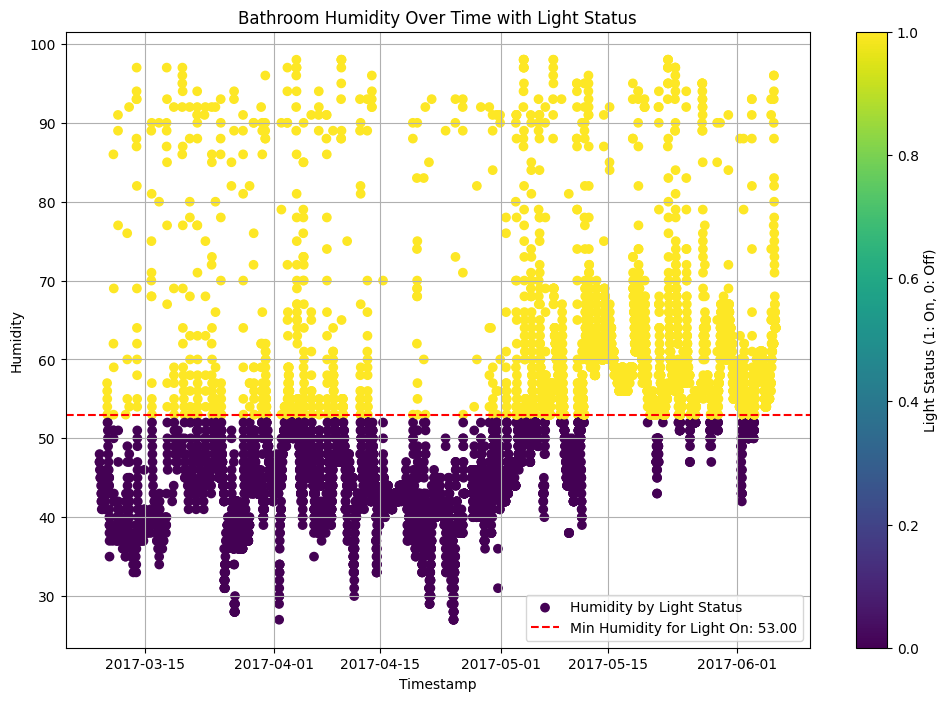

Minimum Humidity Threshold for 'Light On': 53.0


In [13]:
df2=pd.DataFrame(data)

# 1. Check for missing values
print("NULL VALUES PRESENT: \n")
print(df2.isnull().sum())

# 2. Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
# Impute on the 'Humidity' column
df2['Humidity'] = imputer.fit_transform(df2[['Humidity']])

scaler = StandardScaler()
df2['Scaled_Humidity'] = scaler.fit_transform(df2[['Humidity']])
print(df2.head())

# Applying K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df2['Cluster'] = kmeans.fit_predict(df2[['Scaled_Humidity']])

# Determining which cluster corresponds to 'light on' and 'light off'
cluster_centers = kmeans.cluster_centers_.flatten()
light_on_cluster = cluster_centers.argmax()  # Assuming the cluster with the higher mean is 'light on'

# Assigning labels based on the identified cluster
df2['Light_Status'] = (df2['Cluster'] == light_on_cluster).astype(int)

# Find the minimum humidity value where the light is predicted to be on
min_humidity_on = df2[df2['Light_Status'] == 1]['Humidity'].min()

# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(df2['Timestamp'], df2['Humidity'], c=df2['Light_Status'], cmap='viridis', label='Humidity by Light Status')
plt.colorbar(label='Light Status (1: On, 0: Off)')
plt.axhline(y=min_humidity_on, color='red', linestyle='--', label=f'Min Humidity for Light On: {min_humidity_on:.2f}')
plt.xlabel('Timestamp')
plt.ylabel('Humidity')
plt.title('Bathroom Humidity Over Time with Light Status')
plt.legend()
plt.grid(True)
plt.show()



print("Minimum Humidity Threshold for 'Light On':", min_humidity_on)

C:\Users\EDWIN\AppData\Local\Temp\ipykernel_34424\3025818158.py:11: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')


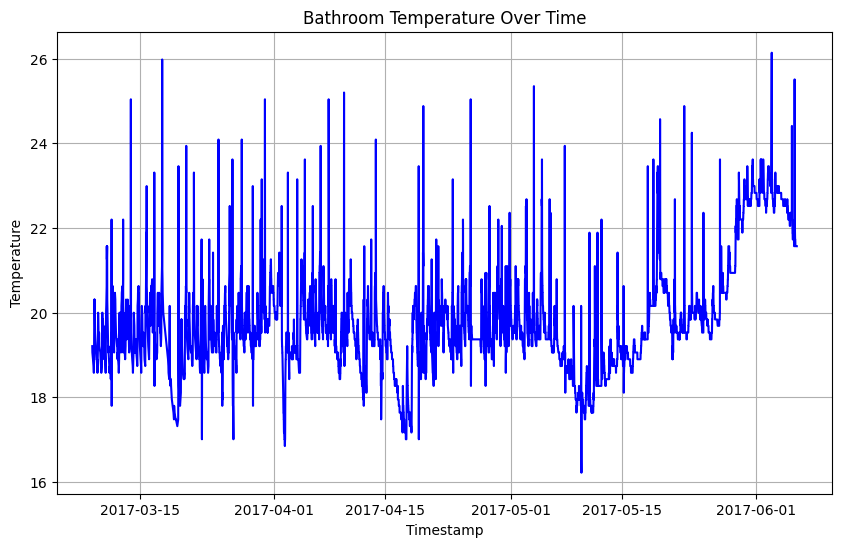

In [14]:


# Path to the CSV file
csv_file_path = 'Bathroom_Temperature.csv'

# Read the CSV file into a DataFrame with tab separation
data = pd.read_csv(csv_file_path, sep=',', header=None, names=['Timestamp_Temperature'])

# Extract timestamp and brightness from the combined column
data[['Timestamp', 'Temperature']] = data['Timestamp_Temperature'].str.split('\t', expand=True)

# Convert timestamp to datetime and brightness to numeric
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data['Temperature'] = data['Temperature'].astype(float)  # Convert to float

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Temperature'], color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Bathroom Temperature Over Time')
plt.grid(True)
plt.show()

NULL VALUES PRESENT: 

Timestamp_Temperature    0
Timestamp                0
Temperature              0
dtype: int64


C:\Users\EDWIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


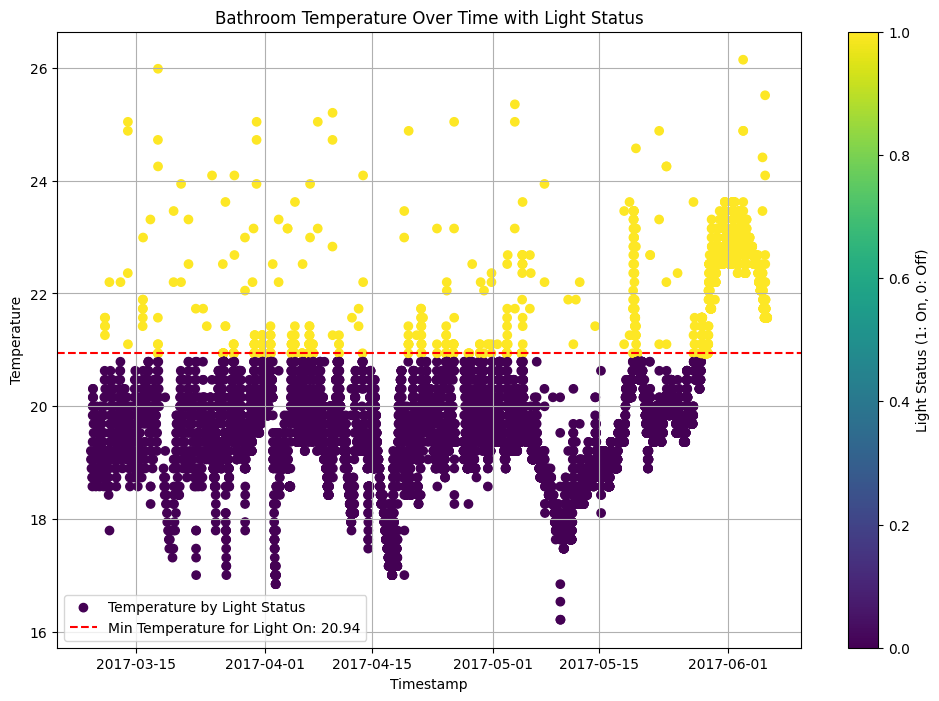

  Timestamp_Temperature           Timestamp  Temperature  Scaled_Temperature  \
0     1489017527\t19.21 2017-03-08 23:57:52        19.21           -0.494473   
1     1489018733\t19.06 2017-03-09 00:19:12        19.06           -0.610894   
2      1489024755\t18.9 2017-03-09 01:59:28        18.90           -0.735077   
3     1489031950\t18.74 2017-03-09 03:58:56        18.74           -0.859260   
4     1489034931\t18.58 2017-03-09 04:48:00        18.58           -0.983443   

   Cluster  Light_Status  
0        0             0  
1        0             0  
2        0             0  
3        0             0  
4        0             0  
Minimum Temperature Threshold for 'Light On': 20.94


In [15]:
df3=pd.DataFrame(data)


# 1. Check for missing values
print("NULL VALUES PRESENT: \n")
print(df3.isnull().sum())

# 2. Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
# Impute on the 'Humidity' column
df3['Temperature'] = imputer.fit_transform(df3[['Temperature']])

scaler = StandardScaler()
df3['Scaled_Temperature'] = scaler.fit_transform(df3[['Temperature']])

# Applying K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df3['Cluster'] = kmeans.fit_predict(df3[['Scaled_Temperature']])

# Determining which cluster corresponds to 'light on' and 'light off'
cluster_centers = kmeans.cluster_centers_.flatten()
light_on_cluster = cluster_centers.argmax()  # Assuming the cluster with the higher mean is 'light on'

# Assigning labels based on the identified cluster
df3['Light_Status'] = (df3['Cluster'] == light_on_cluster).astype(int)

# Find the minimum temperature value where the light is predicted to be on
min_temperature_on = df3[df3['Light_Status'] == 1]['Temperature'].min()

# Visualization
plt.figure(figsize=(12, 8))
plt.scatter(df3['Timestamp'], df3['Temperature'], c=df3['Light_Status'], cmap='viridis', label='Temperature by Light Status')
plt.colorbar(label='Light Status (1: On, 0: Off)')
plt.axhline(y=min_temperature_on, color='red', linestyle='--', label=f'Min Temperature for Light On: {min_temperature_on:.2f}')
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.title('Bathroom Temperature Over Time with Light Status')
plt.legend()
plt.grid(True)
plt.show()



print(df3.head())  # Print some rows to see the data
print("Minimum Temperature Threshold for 'Light On':", min_temperature_on)

In [16]:


# Merging the three DataFrames on 'Timestamp' assuming all have this common column
df = pd.merge(pd.merge(df1, df2, on='Timestamp'), df3, on='Timestamp')
#print(df)

# Determine if a person is present based on temperature and humidity
df['Person_Present'] = ((df['Humidity'] > min_humidity_on) & (df['Temperature'] > min_temperature_on)).astype(int)

# Redefine 'Light_Status' to indicate wastage
df['Light_Waste'] = ((df['Brightness'] > min_brightness_on) & (df['Person_Present'] == 0)).astype(int)

# Preparing the feature matrix X and the target vector y
X = df[['Humidity', 'Brightness', 'Temperature']]
y = df['Light_Waste']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Instantiating the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=54)

# Training the classifier
clf.fit(X_train, y_train)

# Predicting the test set results
y_pred = clf.predict(X_test)

# Checking the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest classifier: {accuracy * 100:.2f}%\n")

# Feature importances
feature_importances = clf.feature_importances_
print(f"Feature importances: {feature_importances}\n")

# Identifying and printing timestamps when light was being wasted
wasted_timestamps = df[(clf.predict(X) == 1) & (df['Light_Waste'] == 1)]['Timestamp']
print("Timestamps when light was being wasted (no person present but light on):")
print(wasted_timestamps)


Accuracy of the Random Forest classifier: 99.97%

Feature importances: [0.05577902 0.89687931 0.04734167]

Timestamps when light was being wasted (no person present but light on):
15     2017-03-10 13:32:48
22     2017-03-11 09:33:52
23     2017-03-11 10:31:28
25     2017-03-11 10:50:40
26     2017-03-11 10:59:12
               ...        
9775   2017-06-02 13:45:36
9776   2017-06-02 13:56:16
9777   2017-06-02 14:04:48
9778   2017-06-02 14:15:28
9779   2017-06-02 14:24:00
Name: Timestamp, Length: 806, dtype: datetime64[ns]


In [17]:

clf = AdaBoostClassifier(n_estimators=100, random_state=54)

# Training the classifier
clf.fit(X_train, y_train)

# Predicting the test set results
y_pred = clf.predict(X_test)

# Checking the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the AdaBoost classifier: {accuracy * 100:.2f}%\n")

# Identifying and printing timestamps when light was being wasted
wasted_timestamps = df[(clf.predict(X) == 1) & (df['Light_Waste'] == 1)]['Timestamp']
print("Timestamps when light was being wasted (no person present but light on):")
print(wasted_timestamps)


Accuracy of the AdaBoost classifier: 100.00%

Timestamps when light was being wasted (no person present but light on):
15     2017-03-10 13:32:48
22     2017-03-11 09:33:52
23     2017-03-11 10:31:28
25     2017-03-11 10:50:40
26     2017-03-11 10:59:12
               ...        
9775   2017-06-02 13:45:36
9776   2017-06-02 13:56:16
9777   2017-06-02 14:04:48
9778   2017-06-02 14:15:28
9779   2017-06-02 14:24:00
Name: Timestamp, Length: 806, dtype: datetime64[ns]


In [18]:

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)


ab_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ab_clf.fit(X_train, y_train)
ab_pred = ab_clf.predict(X_test)


# Combine predictions using a simple majority vote
combined_predictions = np.array([1 if rf_pred[i] + ab_pred[i] > 1 else 0 for i in range(len(rf_pred))])

# Evaluate the combined model
combined_accuracy = accuracy_score(y_test, combined_predictions)
print(f"Combined Model Accuracy: {combined_accuracy * 100:.2f}%")


Combined Model Accuracy: 100.00%
